

# **Step1. Importing Data and Libraries**

In [11]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=column_names)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# **Step2. Exploratory Data Analysis (EDA)**

In [12]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [18]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


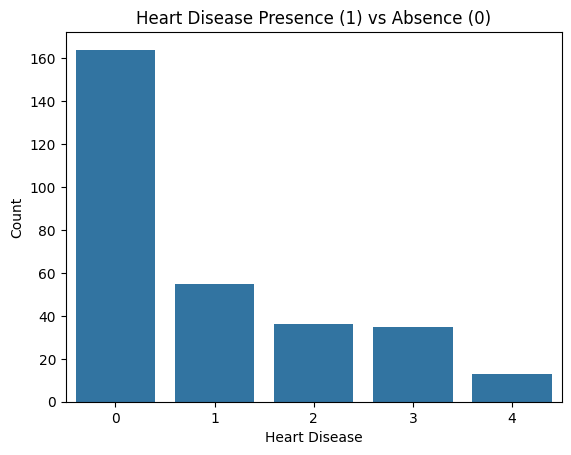

In [19]:
sns.countplot(x='target', data=df)
plt.title('Heart Disease Presence (1) vs Absence (0)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

The bar plot above shows the distribution of heart disease diagnoses in the dataset. The target variable represents the presence of heart disease:

- 0 indicates no heart disease
- Values 1 through 4 represent varying degrees of heart disease severity

The diagram shows that:
- The majority of individuals in the dataset do not have heart disease



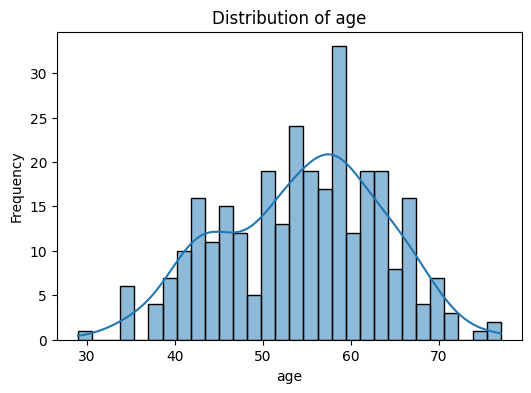

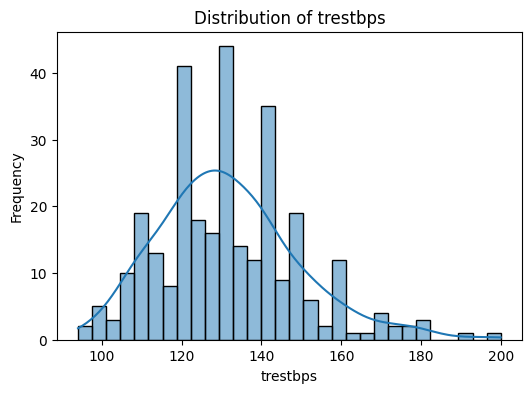

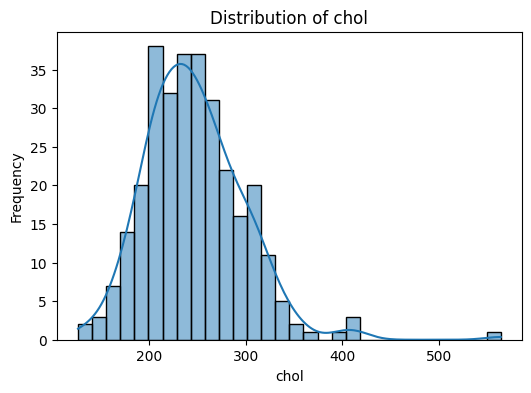

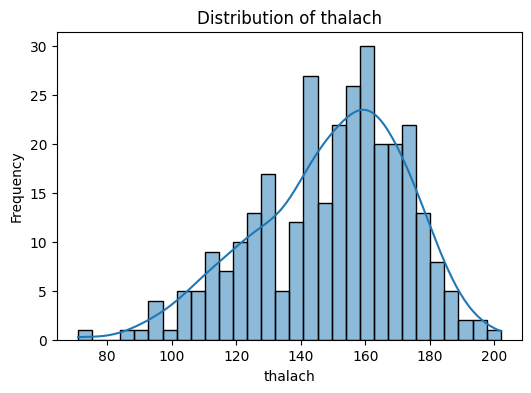

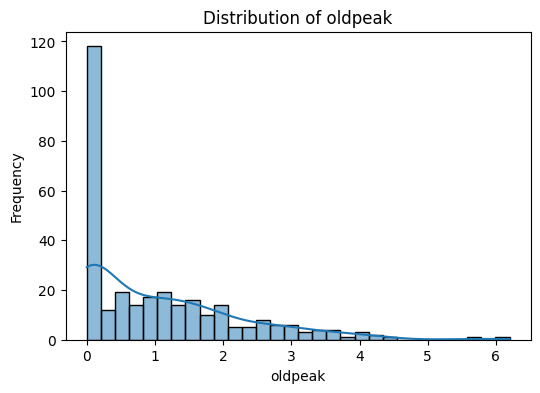

In [20]:
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

The histograms above show the distributions of age, resting blood pressure, cholesterol, and maximum heart rate achieved, and st depression induced by exercise relative to rest.

- Age: The distribution is slightly right-skewed, with most patients between 50 and 60 years old.
- Resting Blood Pressure (trestbps): Mostly centered around 120–140 mm Hg.
- Cholesterol (chol): Appears skewed right but a few extreme values suggest possible outliers.
- Maximum Heart Rate Achieved (thalach): This variable is roughly normal
- ST Depression (oldpeak): This is positively skewed, with many patients showing minimal ST depression (0–1), and fewer with higher levels.

These distributions help identify where the majority of data lies.


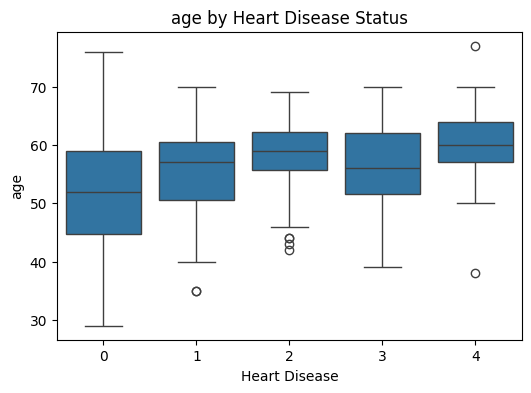

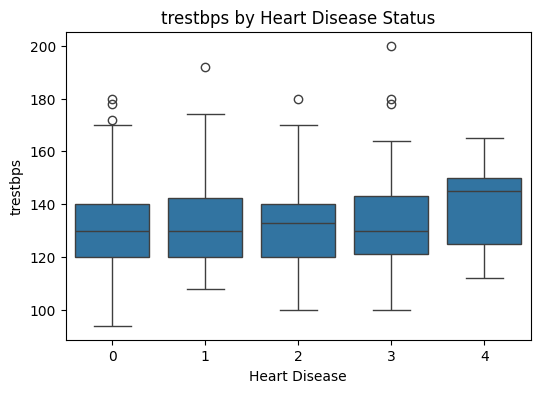

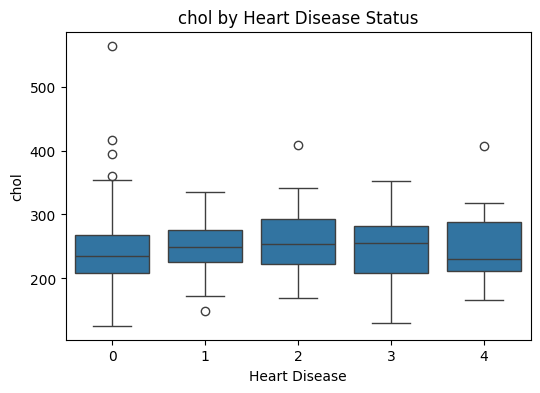

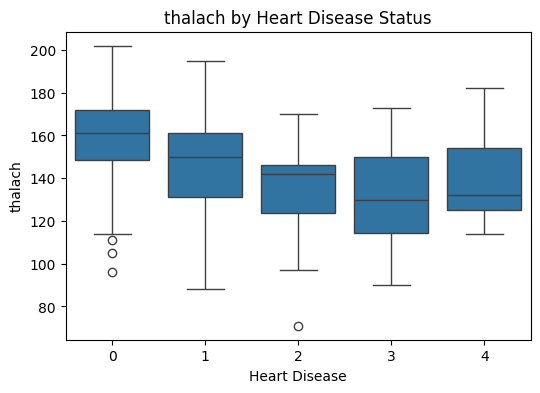

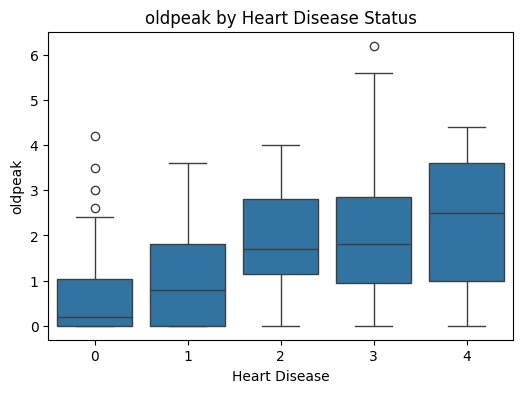

In [25]:
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} by Heart Disease Status')
    plt.xlabel('Heart Disease')
    plt.ylabel(col)
    plt.show()





The boxplots above compare the distributions of numeric variables between patients with and without heart disease(target):

- Age: Patients with heart disease (target = 1 to 4) tend to be older on average than those without (target = 0).
- Resting Blood Pressure (trestbps) and Cholesterol (chol) show overlapping distributions, but may have slightly higher medians.
- Maximum Heart Rate (thalach) appears lower among heart disease patients
- ST Depression (oldpeak) is higher in patients with heart disease.


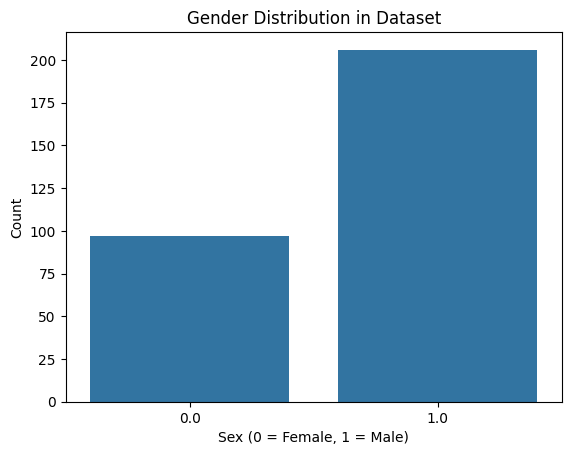

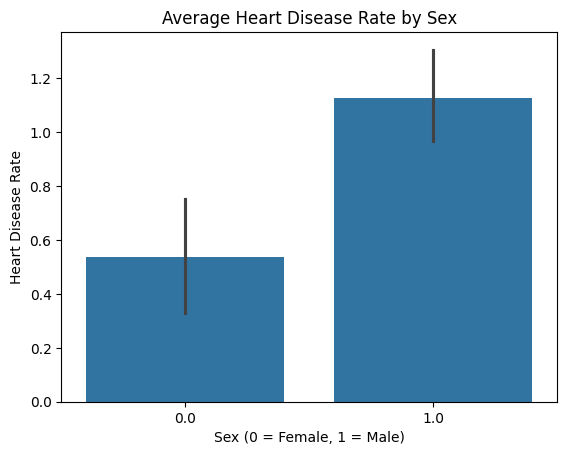

In [26]:
# Gender distribution
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution in Dataset')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

# Show heart disease rates by sex
sns.barplot(x='sex', y='target', data=df)
plt.title('Average Heart Disease Rate by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Heart Disease Rate')
plt.show()


From the bar plot, we  see that the average heart disease rate is higher for males than for females


# **Step 3. Hypothesis Formulation**

Null (H₀): Heart disease occurrence is independent of sex.

Alternative (H₁): Males and females have different probabilities of having heart disease.

In [23]:
male_hd = df[df['sex'] == 1]['target']
female_hd = df[df['sex'] == 0]['target']

t_stat, p_val = ttest_ind(male_hd, female_hd)

print("T-Test for Heart Disease by Sex")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-Test for Heart Disease by Sex
T-statistic: 3.9964
P-value: 0.0001


Since the p-value (0.0001) is less than 0.05, I reject the null hypothesis. Sex does influence the likelihood of having heart disease.

